In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline

['NanumGothic']


In [2]:
df = pd.read_csv("../nationalhealth_2010to2021.csv")
m_data = pd.read_excel("../pandapear/data/meta_data20.xlsx")
df_20 = pd.read_csv("../national_only20_health_2010to2021.csv")

def trans(val): #변수 번역 input str
        return m_data["variable description"][m_data["variable"] == val].values[0]

def disc(val): #설문 내역
        return m_data["option description"][m_data["variable"] == val].values[0]
        
def change2None(data): #통계량을 측정할 때, 결측값 복원
    for i in data.columns:
        data.replace({i:{-1:None}},inplace = True)
        data.replace({i:{-2:None}},inplace = True)
    return data


#타겟 + 피쳐 str list
col_li = df.columns.to_list() 
#타겟 str list
target_li = df.columns[-13:].to_list()
#피쳐 str list
fea_li = df.columns[:-13].to_list()

#범주형 자료 str list
temp = list(m_data["variable"][m_data['data type']== "category"].values)
cat_li = [i for i in temp if i in col_li] #범주형 자료 컬럼 : cat_li
#연속형 자료 str list
temp = list(m_data["variable"][m_data['data type']== "numeric"].values)
expcept = ['ID', 'ID_fam', 'LW_mt_a1', 'age', 'year']
num_li = [i for i in temp if i in col_li] #연속형 자료 컬럼 : num_li

- 'HE_HbA1c' : 당화혈색소
- 'HE_chol' : 총 콜레스트롤
- 'HE_HDL_st2' : HDL-콜레스트롤(보정값)

위 3가지 변수에 대해 20대/ 30-~80대에서의 range를 각각 구하자 

In [6]:
disease = ['HE_HbA1c', 'HE_chol', 'HE_HDL_st2']

In [12]:
df = df[disease +['age']]
df.head()

,HE_HbA1c,HE_chol,HE_HDL_st2,age
0,6.7,215.0,39.956,74.0
1,7.2,144.0,50.420,71.0
2,7.6,198.0,46.060,61.0
3,7.6,162.0,40.828,32.0
4,5.7,165.0,37.340,63.0


## 히스토그램그리기

In [117]:
def make_histogram(data, target_name:str):
    x = data[target_name].values
    print('{}  최솟값  |     최댓값   |     편차    |     평균'.format(target_name))
    print(f'{target_name}  {min(x)}     |     {max(x)}     |     {np.around(x.std(), 3)}   |    {np.around(x.mean(), 3)}')
    print('*' * 50)
    plt.hist(x, bins = 20, label = target_name)
    plt.title('{} Histogram'.format(target_name))
    plt.legend()
    plt.xlabel(target_name)
    

HE_HbA1c  최솟값  |     최댓값   |     편차    |     평균
HE_HbA1c  3.1     |     15.4     |     0.849   |    5.852
**************************************************
HE_chol  최솟값  |     최댓값   |     편차    |     평균
HE_chol  66.0     |     525.0     |     37.706   |    192.562
**************************************************
HE_HDL_st2  최솟값  |     최댓값   |     편차    |     평균
HE_HDL_st2  8.0     |     145.298     |     12.569   |    50.862
**************************************************


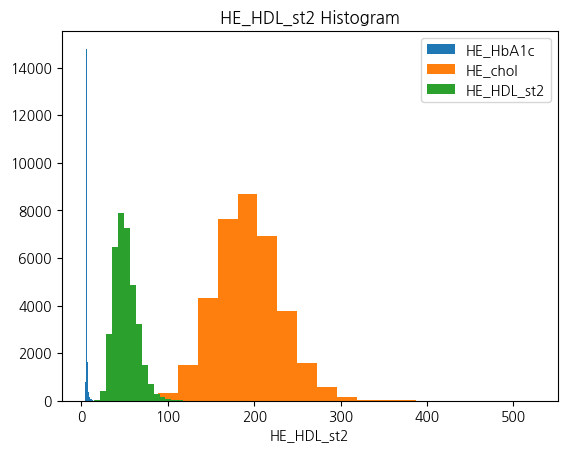

In [119]:
for ill in disease :
    make_histogram(df, ill)



HE_HbA1c  최솟값  |     최댓값   |     편차    |     평균
HE_HbA1c  3.4     |     13.0     |     0.456   |    5.32
**************************************************
HE_chol  최솟값  |     최댓값   |     편차    |     평균
HE_chol  98.0     |     361.0     |     31.222   |    180.091
**************************************************
HE_HDL_st2  최솟값  |     최댓값   |     편차    |     평균
HE_HDL_st2  17.028     |     110.958     |     12.533   |    54.746
**************************************************


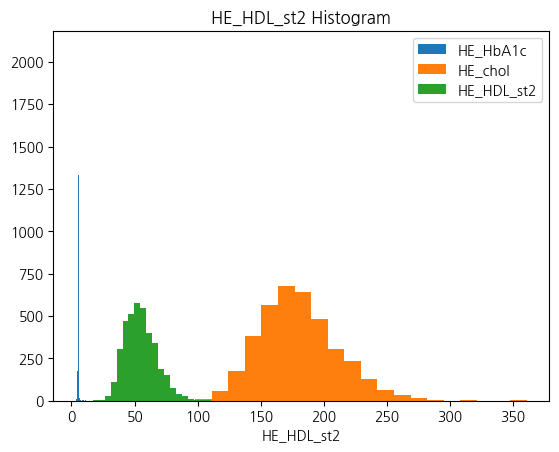

In [120]:
for ill in disease :
    make_histogram(df_20, ill)


HE_HbA1c  최솟값  |     최댓값   |     편차    |     평균
HE_HbA1c  3.1     |     15.4     |     0.849   |    5.852
**************************************************
HE_HbA1c  최솟값  |     최댓값   |     편차    |     평균
HE_HbA1c  3.4     |     13.0     |     0.456   |    5.32
**************************************************


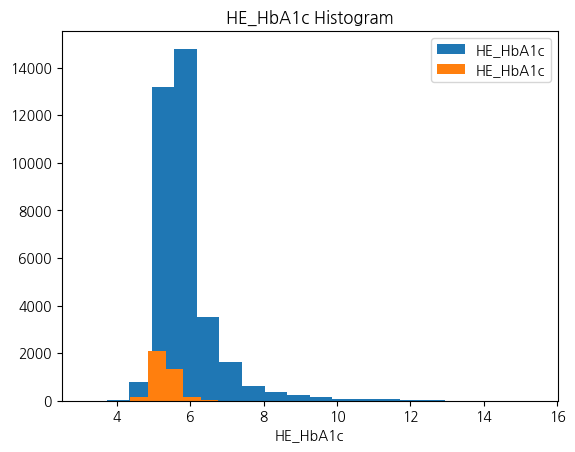

In [121]:
make_histogram(df, 'HE_HbA1c')
make_histogram(df_20, 'HE_HbA1c')

HE_chol  최솟값  |     최댓값   |     편차    |     평균
HE_chol  66.0     |     525.0     |     37.706   |    192.562
**************************************************
HE_chol  최솟값  |     최댓값   |     편차    |     평균
HE_chol  98.0     |     361.0     |     31.222   |    180.091
**************************************************


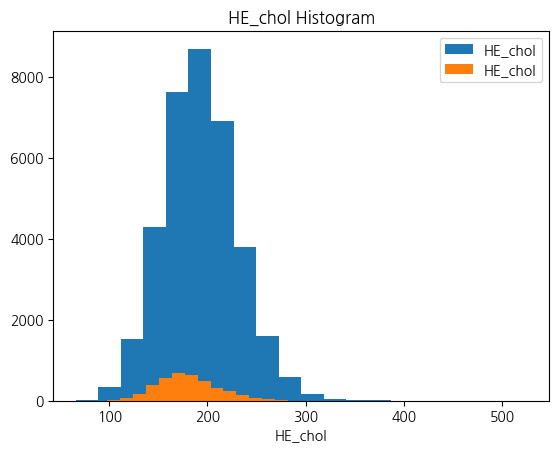

In [122]:
make_histogram(df, 'HE_chol')
make_histogram(df_20, 'HE_chol')

HE_HDL_st2  최솟값  |     최댓값   |     편차    |     평균
HE_HDL_st2  8.0     |     145.298     |     12.569   |    50.862
**************************************************
HE_HDL_st2  최솟값  |     최댓값   |     편차    |     평균
HE_HDL_st2  17.028     |     110.958     |     12.533   |    54.746
**************************************************


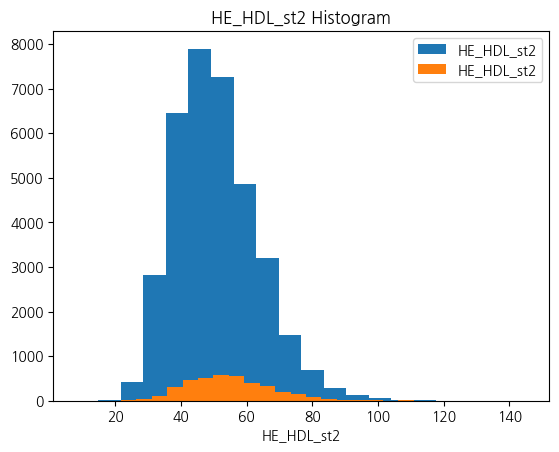

In [123]:
make_histogram(df, 'HE_HDL_st2')
make_histogram(df_20, 'HE_HDL_st2')

HE_HbA1c  최솟값  |     최댓값   |     편차    |     평균
HE_HbA1c  3.1     |     15.4     |     0.849   |    5.852
**************************************************
HE_HbA1c  최솟값  |     최댓값   |     편차    |     평균
HE_HbA1c  3.4     |     13.0     |     0.456   |    5.32
**************************************************
HE_chol  최솟값  |     최댓값   |     편차    |     평균
HE_chol  66.0     |     525.0     |     37.706   |    192.562
**************************************************
HE_chol  최솟값  |     최댓값   |     편차    |     평균
HE_chol  98.0     |     361.0     |     31.222   |    180.091
**************************************************
HE_HDL_st2  최솟값  |     최댓값   |     편차    |     평균
HE_HDL_st2  8.0     |     145.298     |     12.569   |    50.862
**************************************************
HE_HDL_st2  최솟값  |     최댓값   |     편차    |     평균
HE_HDL_st2  17.028     |     110.958     |     12.533   |    54.746
**************************************************


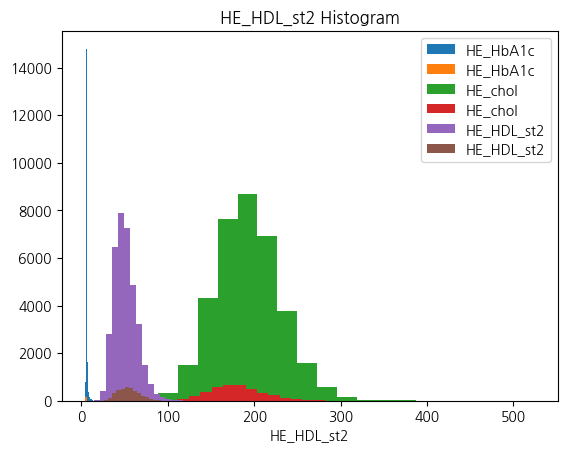

In [125]:
make_histogram(df, 'HE_HbA1c')
make_histogram(df_20, 'HE_HbA1c')
make_histogram(df, 'HE_chol')
make_histogram(df_20, 'HE_chol')
make_histogram(df, 'HE_HDL_st2')
make_histogram(df_20, 'HE_HDL_st2')

## normalize

분포는 대략적 비슷해보인다. -> 정규화 진행
- 이제 20대와 30~80대의 인원등을 고려해서 normalize를 진행하고, 
- 30~80대의 어떤 비율이 20대에서 같은 비율에 속하는지 확인하자


In [139]:
def make_standardization(data, target_name:str):
    x = data[target_name].values
    z = (x - x.mean())/x.std()
    z = np.around(z, 3)
    print('{}  최솟값  |     최댓값   |     편차    |     평균'.format(target_name))
    print(f'{target_name}  {min(z)}     |     {max(z)}     |     {np.around(z.std(), 3)}   |    {np.around(z.mean(), 3)}')
    print('*' * 50)
    plt.hist(z, bins = 20, label = target_name)
    plt.title('{} Histogram'.format(target_name))
    plt.legend()
    plt.xlabel(target_name)

In [135]:
disease

['HE_HbA1c', 'HE_chol', 'HE_HDL_st2']

HE_HbA1c  최솟값  |     최댓값   |     편차    |     평균
HE_HbA1c  -3.243     |     11.252     |     1.0   |    0.0
**************************************************
HE_HbA1c  최솟값  |     최댓값   |     편차    |     평균
HE_HbA1c  -4.214     |     16.851     |     1.0   |    0.0
**************************************************
HE_chol  최솟값  |     최댓값   |     편차    |     평균
HE_chol  -3.357     |     8.817     |     1.0   |    0.0
**************************************************
HE_chol  최솟값  |     최댓값   |     편차    |     평균
HE_chol  -2.629     |     5.794     |     1.0   |    0.0
**************************************************
HE_HDL_st2  최솟값  |     최댓값   |     편차    |     평균
HE_HDL_st2  -3.41     |     7.514     |     1.0   |    -0.0
**************************************************
HE_HDL_st2  최솟값  |     최댓값   |     편차    |     평균
HE_HDL_st2  -3.009     |     4.485     |     1.0   |    -0.0
**************************************************


C:\Users\jihoo\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


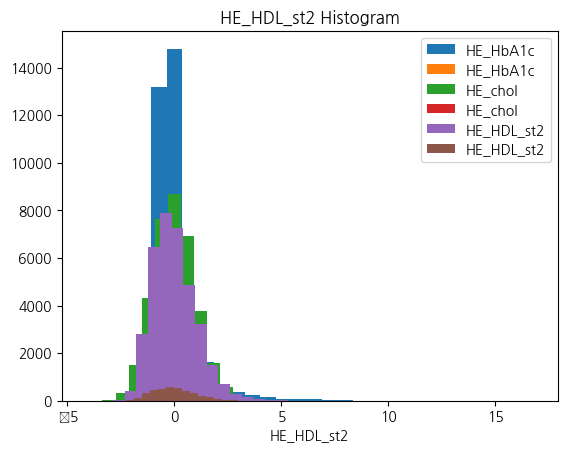

In [140]:
make_standardization(df, 'HE_HbA1c')
make_standardization(df_20, 'HE_HbA1c')
make_standardization(df, 'HE_chol')
make_standardization(df_20, 'HE_chol')
make_standardization(df, 'HE_HDL_st2')
make_standardization(df_20, 'HE_HDL_st2')

그래프를 모두 그리면 이렇게 나온다. 따라서 같은 질병끼리만 고려를 해야한다. 

이제 30-80대 A질병에서 몇 퍼 이상알때를 똑같이 20대 A질병에서 어디에 속하는지를 알아보자

In [142]:
disease

['HE_HbA1c', 'HE_chol', 'HE_HDL_st2']

HE_HbA1c  최솟값  |     최댓값   |     편차    |     평균
HE_HbA1c  3.1     |     15.4     |     0.849   |    5.852
**************************************************
HE_HbA1c  최솟값  |     최댓값   |     편차    |     평균
HE_HbA1c  3.4     |     13.0     |     0.456   |    5.32
**************************************************
HE_HbA1c  최솟값  |     최댓값   |     편차    |     평균
HE_HbA1c  -3.243     |     11.252     |     1.0   |    0.0
**************************************************
HE_HbA1c  최솟값  |     최댓값   |     편차    |     평균
HE_HbA1c  -4.214     |     16.851     |     1.0   |    0.0
**************************************************


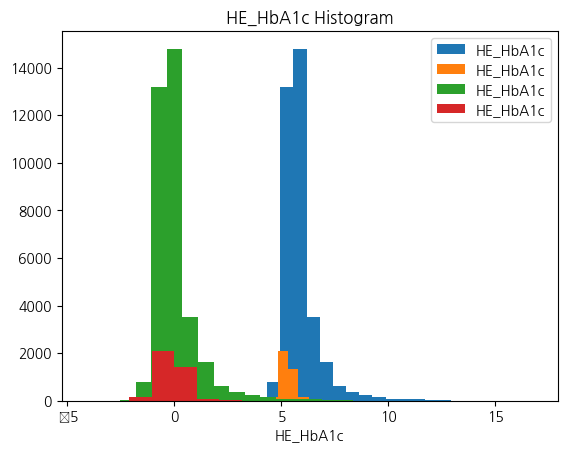

In [144]:
make_histogram(df, 'HE_chol')
make_histogram(df_20, 'HE_chol')
make_standardization(df, 'HE_chol')
make_standardization(df_20, 'HE_HbA1c')

In [ ]:
def make_histogram(data, target_name:str):
    x = data[target_name].values
    print('{}  최솟값  |     최댓값   |     편차    |     평균'.format(target_name))
    print(f'{target_name}  {min(x)}     |     {max(x)}     |     {np.around(x.std(), 3)}   |    {np.around(x.mean(), 3)}')
    print('*' * 50)
    plt.hist(x, bins = 20, label = target_name)
    plt.title('{} Histogram'.format(target_name))
    plt.legend()
    plt.xlabel(target_name)

In [163]:
def raw2standard(data, x, target_name):
    '''
    rawdata를 표준화 시킨는 함수
        값을 정규화된 값으로 바꿔준다. 
        data : df/ df_20
        x : raw데이터에서 정규화로 볼 값
        target_name : 
    
    '''
    val = data[target_name].values
    z = np.around((x - val.mean()) / val.std(), 3)
    return z

In [169]:
raw2standard(df, 7, 'HE_HbA1c')

1.353

In [145]:
## return to raw
def standar2raw(data, z, target_name):
    '''
    표준화 값을 raw데이터의 값으로 치환
    
    
    '''
    
    val = data[target_name].values
    x = (z * val.std()) + val.mean()
    return x 

In [165]:
standar2raw(df,4.88, 'HE_HbA1c')

9.99295430963522

설명

In [168]:
raw2standard(df_20, 7, 'HE_HbA1c')

3.685

In [172]:
raw2standard(df, 7, 'HE_HbA1c')

1.353